<a href="https://colab.research.google.com/github/artxic/lungcancer/blob/main/Lungcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
lung_data = pd.read_csv("survey lung cancer.csv")

In [ ]:
lung_data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
lung_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
lung_data.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [ ]:
#dependent_variable
x = lung_data.iloc[:,0:-1]
print(x)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                  1        2        1         2                  2         2   
1                  2 

In [ ]:
#independent_variable
y = lung_data. iloc[:,-1:]
print(y)

    LUNG_CANCER
0           YES
1           YES
2            NO
3            NO
4            NO
..          ...
304         YES
305         YES
306         YES
307         YES
308         YES

[309 rows x 1 columns]


In [ ]:
lung_data.GENDER = lung_data.GENDER.map({"M":1,"F":2})
lung_data.LUNG_CANCER = lung_data.LUNG_CANCER.map({"YES":1,"NO":2})

In [ ]:
lung_data.shape

(309, 16)

In [ ]:
lung_data.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
lung_data.dtypes

,0
GENDER,int64
AGE,int64
SMOKING,int64
YELLOW_FINGERS,int64
ANXIETY,int64
PEER_PRESSURE,int64
CHRONIC DISEASE,int64
FATIGUE,int64
ALLERGY,int64
WHEEZING,int64


In [ ]:
lung_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,2
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2


In [ ]:
lung_data.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,2,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1
308,1,62,1,1,1,2,1,2,2,2,2,1,1,2,1,1


In [ ]:
#the describe() method returns description of data in DataFrame
lung_data.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,1.475728,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,1.126214
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,2.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
#the info() method prints information of the database
lung_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [ ]:
#Splitting the Dataset: Training and Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=0)

In [ ]:
lung_data['LUNG_CANCER'].value_counts()

,count
LUNG_CANCER,
1,270
2,39


In [ ]:
len(lung_data)

309

In [ ]:
len(x_test)

103

In [ ]:
len(x_train)

206

In [ ]:
#dependent_variable
x = lung_data.iloc[:,0:-1]
x

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [ ]:
#independent_variable
y = lung_data.iloc[:,-1:]
y

,LUNG_CANCER
0,1
1,1
2,2
3,2
4,2
...,...
304,1
305,1
306,1
307,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=0)

In [ ]:
#Fitting simple linear regression to the training test
Model1 = LogisticRegression()
Model1.fit(x_train, y_train)
#Predicting the test set results
prediction1 = Model1.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
prediction1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confusion_matrix(y_test,prediction1)

array([[85,  2],
       [10,  6]])

In [ ]:
 accuracy_score(y_test,prediction1)

0.883495145631068

In [ ]:
from sklearn.metrics import precision_score
probs = Model1.predict_proba(x_test)
precision_score(y_test, prediction1, average = None)

array([0.89473684, 0.75      ])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# assuming your predicted and actual labels are stored in variables y_pred and y_true, respectively
accuracy = accuracy_score(y_test, prediction1)
precision = precision_score(y_test, prediction1)
recall = recall_score(y_test, prediction1)
f1 = f1_score(y_test, prediction1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.883495145631068
Precision: 0.8947368421052632
Recall: 0.9770114942528736
F1 score: 0.9340659340659341


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
recall_score(y_test, prediction1, average = None)

array([0.97701149, 0.375     ])

In [ ]:
 f1_score(y_test, prediction1, average = None)

array([0.93406593, 0.5       ])

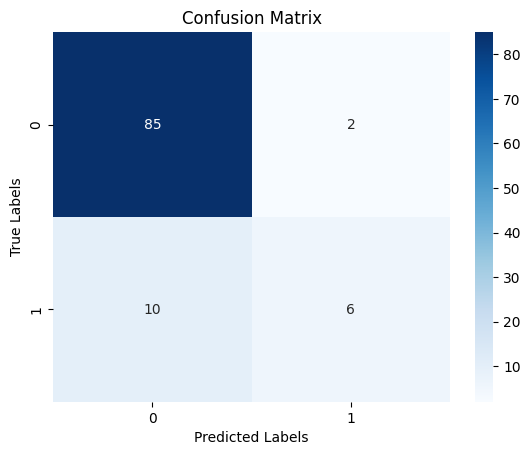

In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred = prediction1)
#plot_confusion_matrix(cm,level,title = "confusion_matrix")
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Building a predictive system
input_data = (2,63,1,2,1,1,1,1,1,2,1,2,2,1,1)
input_data_array = np.asarray(input_data)
input_data_reshaped = input_data_array.reshape(1,-1)

In [ ]:
prediction = Model1.predict(input_data_reshaped)
if(prediction == 1):
  print("Lung Cancer Detected")

else:
  print("Minor issues only. No Symptoms of lung cancer" )

Minor issues only. No Symptoms of lung cancer


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
